In [1]:
# load data
%pylab
%matplotlib inline
import pandas as pd
from google.colab import files
uploaded = files.upload()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


Saving University statistics - Cleaned Data.csv to University statistics - Cleaned Data.csv


In [15]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['University statistics - Cleaned Data.csv']),
                    header=0, index_col='School')
# Rows with Overseas Chinese student number --> Country total + uni specifics
relevant = my_data[my_data['Overseas Chinese student number'].notnull()].drop(columns=['System', 'Date', 'Total student number'])

chinese = relevant[['Country', 'Overseas Chinese student number', 'Domestic Chinese student number']].copy()
chinese['Overseas Chinese student number'] = chinese['Overseas Chinese student number'].astype(int)
chinese['Domestic Chinese student number'] = chinese['Domestic Chinese student number'].astype(int)
chinese['Total Chinese student number'] = chinese['Overseas Chinese student number'] + chinese['Domestic Chinese student number']
chinese.head()

,Country,Overseas Chinese student number,Domestic Chinese student number,Total Chinese student number
School,,,,
US Total,US,282276,587200,869476
Stanford,US,1255,360,1615
MIT,US,839,250,1089
Yale,US,799,290,1089
NYU,US,5632,1020,6652


In [0]:
num_of_country = 4

# sorted by overseas chinese
overseas_s = chinese.sort_values(by='Overseas Chinese student number', ascending=False)

# separate country total from uni
country_o_s = overseas_s.iloc[:num_of_country]
uni_o_s = overseas_s.iloc[num_of_country:]

# sorted by domestic chinese
domestic_s = chinese.sort_values(by='Domestic Chinese student number', ascending=False)

# separate country total from uni
country_d_s = domestic_s.iloc[:num_of_country]
uni_d_s = domestic_s.iloc[num_of_country:]

# sorted by total chinese
totalchin_s = chinese.sort_values(by='Total Chinese student number', ascending=False)

# separate country total from uni
country_t_s = totalchin_s.iloc[:num_of_country]
uni_t_s = totalchin_s.iloc[num_of_country:]

In [4]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# from wide format to long format
long_country = pd.melt(country_o_s.reset_index(), id_vars=['School'], value_vars=['Overseas Chinese student number', 'Domestic Chinese student number']).sort_values(['variable','value'], ascending=False)
long_uni = pd.melt(uni_o_s.reset_index(), id_vars=['School'], value_vars=['Overseas Chinese student number', 'Domestic Chinese student number']).sort_values(['variable','value'], ascending=False)
long_country

,School,variable,value
0,US Total,Overseas Chinese student number,282276
1,Australia Total,Overseas Chinese student number,158319
2,UK Total,Overseas Chinese student number,120385
3,Canada Total,Overseas Chinese student number,74260
4,US Total,Domestic Chinese student number,587200
7,Canada Total,Domestic Chinese student number,50800
6,UK Total,Domestic Chinese student number,28200
5,Australia Total,Domestic Chinese student number,18800


# Total Chinese student number - by country

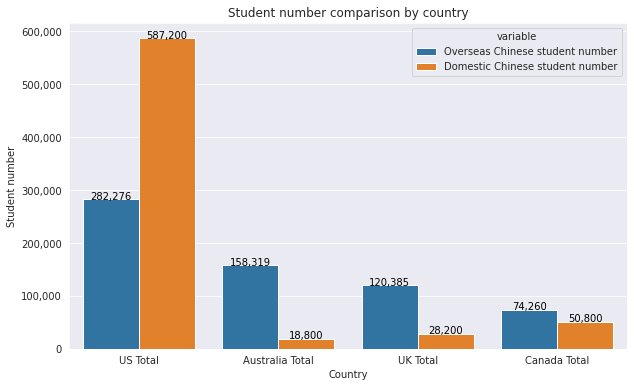

In [8]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Student number comparison by country")

g = sns.barplot(x='School', y='value', hue='variable', data=long_country)

plt.ylabel("Student number")
plt.xlabel("Country")
plt.xticks(rotation=0)
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

dx = 0.2
temp_x_coord = [0-dx, 1-dx, 2-dx, 3-dx, 0+dx, 3+dx, 2+dx, 1+dx]

for i, v in enumerate(long_country.value):
    g.text(temp_x_coord[i], v+1, format(v, ','), color='black', ha='center')

# Overseas Chinese student number - by university



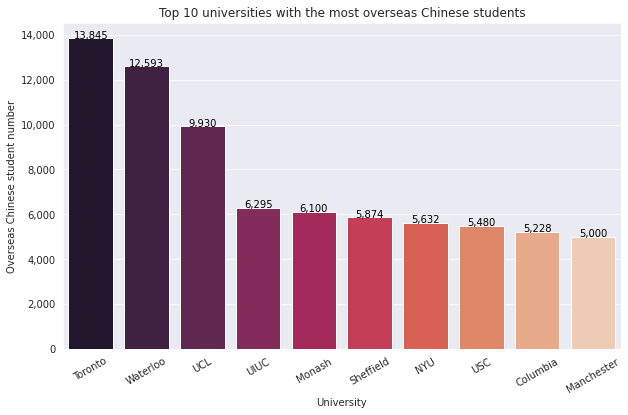

In [9]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most overseas Chinese students")

# Bar chart showing top 10 universities with the most overseas Chinese students
x=uni_o_s.index[:10]
y=uni_o_s['Overseas Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i, v in enumerate(y):
    g.text(i, v+1, format(v, ','), color='black', ha='center')

'\n# To add a common y label\nsns.set_style(\'white\')\nf.add_subplot(111, frame_on=False)\nplt.tick_params(labelcolor="none", bottom=False, left=False)\nplt.ylabel("Overseas Chinese student number", fontsize=10)\n'

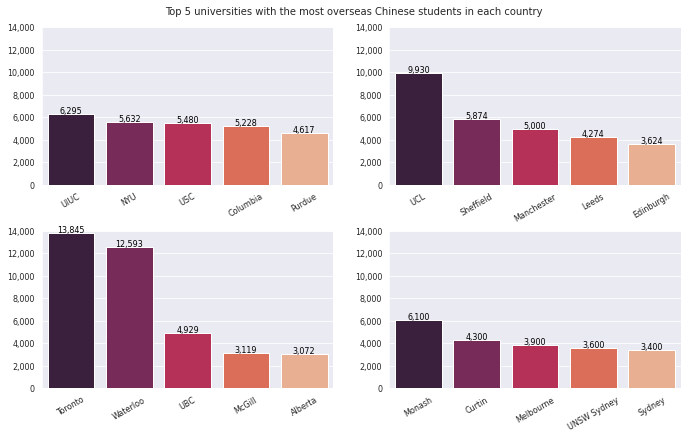

In [10]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=2.5)

plt.suptitle("Top 5 universities with the most overseas Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  x=temp_uni_o_s.index[:5]
  y=temp_uni_o_s['Overseas Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="rocket", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 14000))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')
  axes[id // 2, id % 2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


  for i, v in enumerate(y):
      g.text(i, v+1, format(v, ','), color='black', ha='center', fontsize=8)
'''
# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Overseas Chinese student number", fontsize=10)
'''

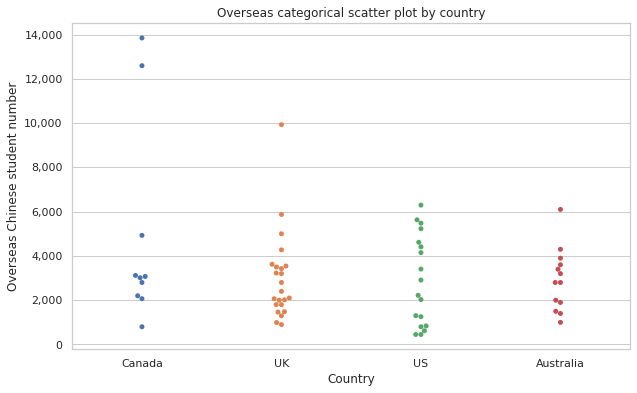

In [11]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
g = sns.swarmplot(x=uni_o_s['Country'],
              y=uni_o_s['Overseas Chinese student number'])
plt.title('Overseas categorical scatter plot by country')
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Domestic Chinese student number - by university

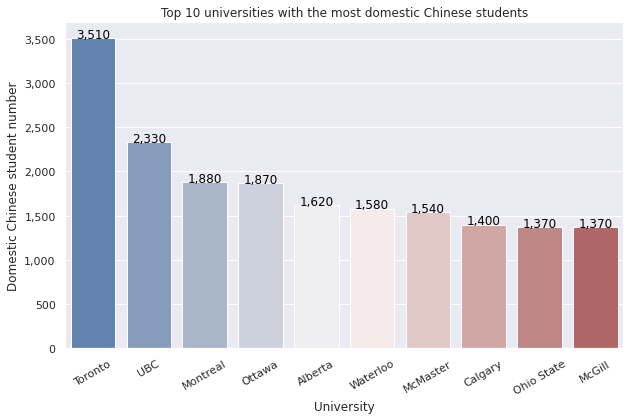

In [12]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most domestic Chinese students")

# Bar chart showing top 10 universities with the most domestic Chinese students
x=uni_d_s.index[:10]
y=uni_d_s['Domestic Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="vlag")

plt.ylabel("Domestic Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i, v in enumerate(y):
    g.text(i, v+1, format(v, ','), color='black', ha='center')

'\n# To add a common y label\nsns.set_style(\'white\')\nf.add_subplot(111, frame_on=False)\nplt.tick_params(labelcolor="none", bottom=False, left=False)\nplt.ylabel("Domestic Chinese student number", fontsize=10)\n'

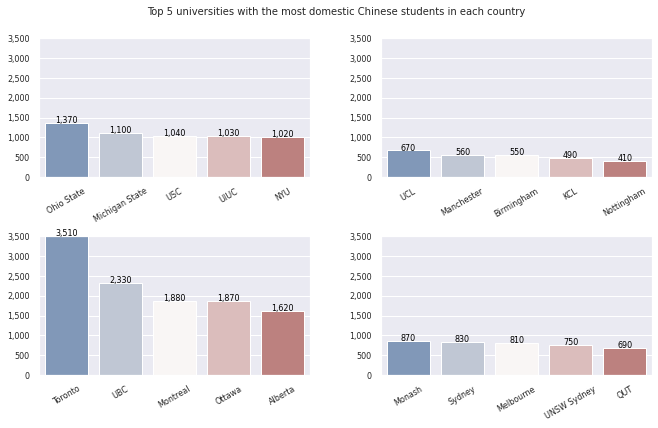

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most domestic Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_d_s = uni_d_s[uni_d_s['Country']==country]

  x=temp_uni_d_s.index[:5]
  y=temp_uni_d_s['Domestic Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="vlag", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 3500))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')
  axes[id // 2, id % 2].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


  for i, v in enumerate(y):
      g.text(i, v+1, format(v, ','), color='black', ha='center', fontsize=8)
'''
# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Domestic Chinese student number", fontsize=10)
'''

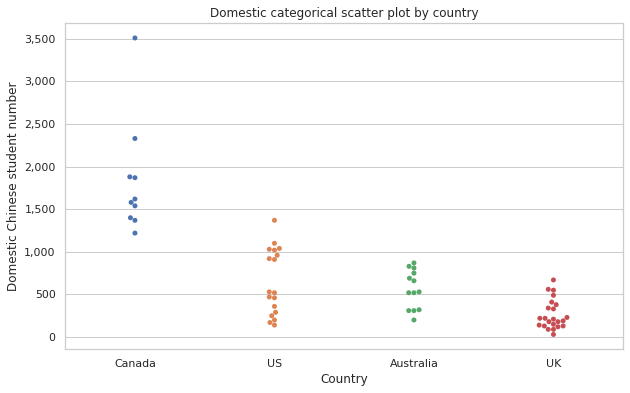

In [14]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
g = sns.swarmplot(x=uni_d_s['Country'],
              y=uni_d_s['Domestic Chinese student number'])
plt.title('Domestic categorical scatter plot by country')
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Total Chinese - by university

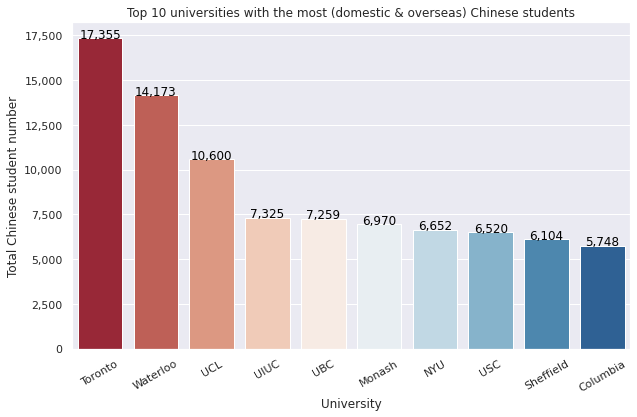

In [17]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most (domestic & overseas) Chinese students")

# Bar chart showing top 10 universities with the most (domestic & overseas) Chinese students
x=uni_t_s.index[:10]
y=uni_t_s['Total Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="RdBu")

plt.ylabel("Total Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i, v in enumerate(y):
    g.text(i, v+1, format(v, ','), color='black', ha='center')

'\n# To add a common y label\nsns.set_style(\'white\')\nf.add_subplot(111, frame_on=False)\nplt.tick_params(labelcolor="none", bottom=False, left=False)\nplt.ylabel("Domestic Chinese student number", fontsize=10)\n'

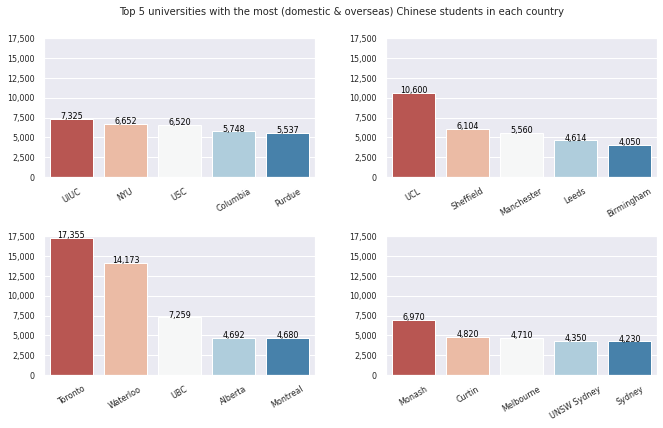

In [19]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most (domestic & overseas) Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_t_s = uni_t_s[uni_t_s['Country']==country]

  x=temp_uni_t_s.index[:5]
  y=temp_uni_t_s['Total Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="RdBu", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 17500))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')
  axes[id // 2, id % 2].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


  for i, v in enumerate(y):
      g.text(i, v+1, format(v, ','), color='black', ha='center', fontsize=8)
'''
# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Domestic Chinese student number", fontsize=10)
'''

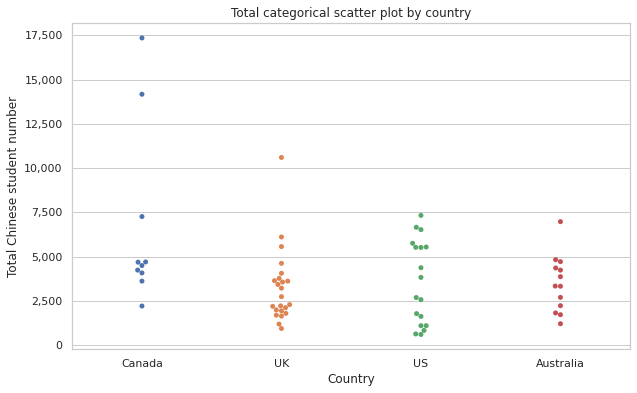

In [20]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
g = sns.swarmplot(x=uni_t_s['Country'],
              y=uni_t_s['Total Chinese student number'])
plt.title('Total categorical scatter plot by country')
g.axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# University Ranking

In [0]:
ranking = relevant.copy()

# drop country total
ranking = ranking[ranking['2020 QS Ranking'].notna()]

cols = ranking.columns.drop(['Country', 'Overseas Chinese student number', 'Domestic Chinese student number'])
ranking[cols] = ranking[cols].apply(pd.to_numeric, errors='coerce')
ranking['Total Chinese student number'] = ranking['Overseas Chinese student number'] + ranking['Domestic Chinese student number']
# ranking.head()

Ranking classification criteria

*   'Top 20' if all three rankings <= 20
*   'Top 50' if all three rankings <= 50 but not 'Top 20'
*   'Top 100' if all three rankings <= 100 but neither 'Top 20' nor 'Top 50'
*   'Top 200' if all three rankings <= 200 but neither 'Top 20', 'Top 50' nor 'Top 100'
*   'Others'








In [24]:
def r_classify(row):
    max_rank = max(row['2020 QS Ranking'], row['2020 THE Ranking'], row['2019 ARWU Ranking'])
    if max_rank <= 20:
        val = 'Top 20'
    elif max_rank <= 50:
        val = 'Top 50'
    elif max_rank <= 100:
        val = 'Top 100'
    elif max_rank <= 200:
        val = 'Top 200'
    else:
        val = 'Others'
    return val

# ranking['Ranking sum'] = ranking['2020 QS Ranking'] + ranking['2020 THE Ranking'] + ranking['2019 ARWU Ranking']
ranking['Ranking class'] = ranking.apply(r_classify, axis=1)
ranking.head()

,Country,2020 QS Ranking,2020 QS Score,2020 THE Ranking,2020 THE Score,2019 ARWU Ranking,2019 ARWU Score,Overseas Chinese student number,Domestic Chinese student number,Total Chinese student number,Ranking class
School,,,,,,,,,,,
Stanford,US,2.0,98.4,4.0,94.3,2.0,75.1,1255.0,360.0,1615.0,Top 20
MIT,US,1.0,100.0,5.0,93.6,4.0,69.0,839.0,250.0,1089.0,Top 20
Yale,US,17.0,87.7,8.0,91.7,11.0,50.8,799.0,290.0,1089.0,Top 20
NYU,US,39.0,78.8,29.0,81.1,30.0,38.1,5632.0,1020.0,6652.0,Top 50
Harvard,US,3.0,97.4,7.0,93.0,1.0,100.0,1301.0,470.0,1771.0,Top 20


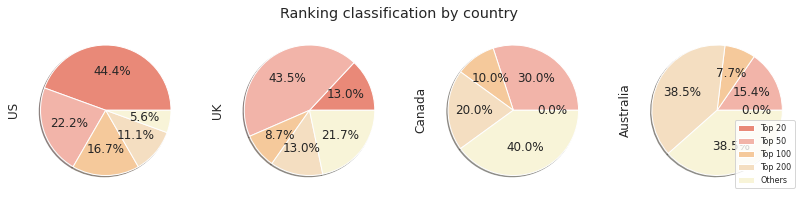

In [27]:
categories = ranking['Ranking class'].unique()

country_list = ['US', 'UK', 'Canada', 'Australia']

df = pd.DataFrame()

for id, country in enumerate(country_list):

  temp_ranking = ranking[ranking['Country']==country]

  temp = temp_ranking['Ranking class'].value_counts().rename(country)
  
  df = pd.concat([df, temp], axis=1)

colors = ['#E98978', '#F2B4A9', '#F5C99B', '#F4DEC1', '#F8F4D8']

g = df.plot.pie(subplots=True, labels=None, legend=None,
                figsize=(14, 3), shadow=True, autopct='%1.1f%%',
                title="Ranking classification by country",
                colors = colors)

# reorder legend
idx = df.index
re_idx = [idx[0], idx[2], idx[3], idx[1], idx[4]]
plt.legend(re_idx, loc='lower right', fontsize=8)

# Chinese + Ranking

## Overseas - by country

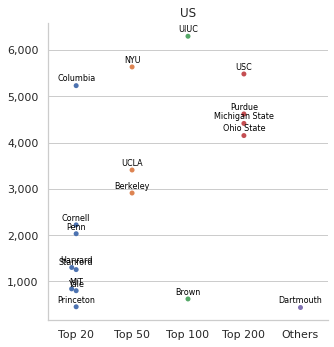

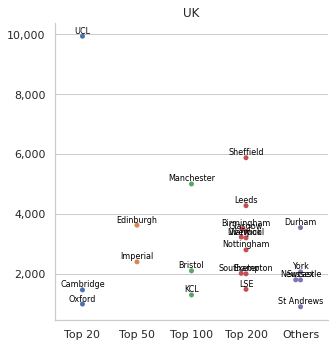

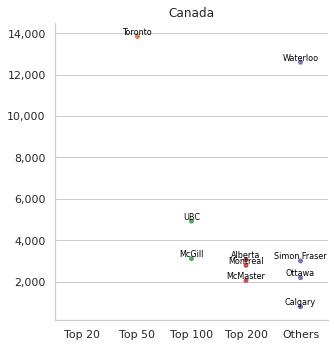

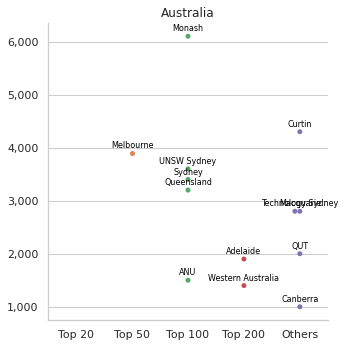

In [0]:
for id, country in enumerate(country_list):

  # Categorical scatter plot
  sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

  temp_data = ranking[ranking['Country'] == country]
  temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

  #sns.catplot(x="Country", y="Overseas Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
  g = sns.catplot(x="Ranking class", y="Overseas Chinese student number",
              kind="swarm", data=temp_data,
              order = temp_x_order)

  plt.title(country)
  plt.xlabel('')
  plt.ylabel('')
  g.axes[0][0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

  for i in range(len(temp_data.index)):
    x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
    g.axes[0][0].text(x_coord, temp_data["Overseas Chinese student number"].iloc[i]+100,
           str(temp_data.index[i]), color='black', ha='center', fontsize=8)

## Domestic - by country

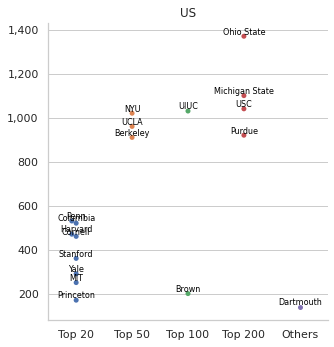

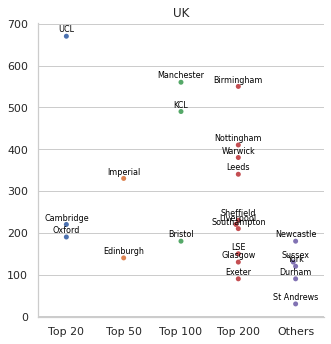

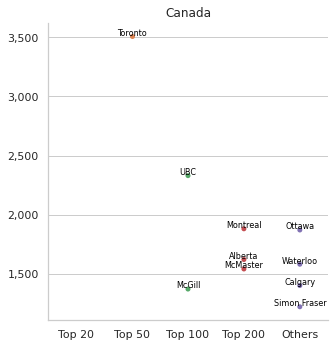

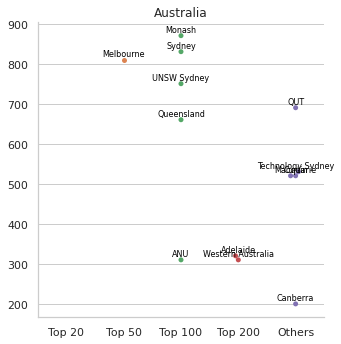

In [29]:
for id, country in enumerate(country_list):

  # Categorical scatter plot
  sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

  temp_data = ranking[ranking['Country'] == country]
  temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

  #sns.catplot(x="Country", y="Domestic Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
  g = sns.catplot(x="Ranking class", y="Domestic Chinese student number",
              kind="swarm", data=temp_data,
              order = temp_x_order)

  plt.title(country)
  plt.xlabel('')
  plt.ylabel('')
  g.axes[0][0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

  for i in range(len(temp_data.index)):
    x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
    g.axes[0][0].text(x_coord, temp_data["Domestic Chinese student number"].iloc[i]+10,
           str(temp_data.index[i]), color='black', ha='center', fontsize=8)

## Total Chinese - by country

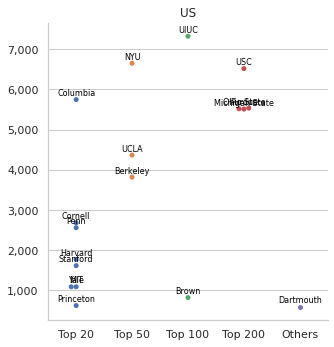

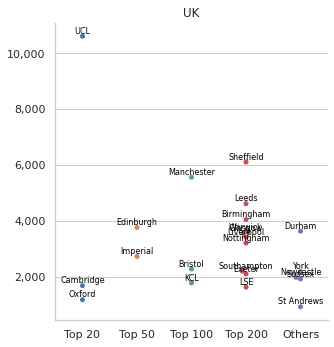

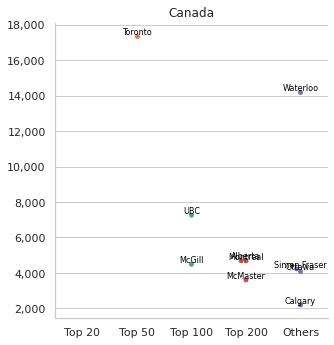

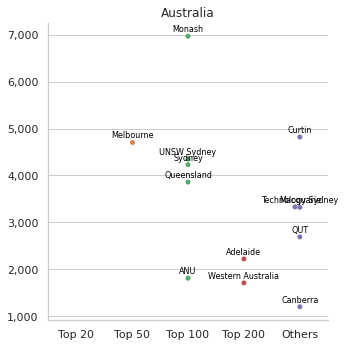

In [30]:
for id, country in enumerate(country_list):

  # Categorical scatter plot
  sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

  temp_data = ranking[ranking['Country'] == country]
  temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

  #sns.catplot(x="Country", y="Total Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
  g = sns.catplot(x="Ranking class", y="Total Chinese student number",
              kind="swarm", data=temp_data,
              order = temp_x_order)

  plt.title(country)
  plt.xlabel('')
  plt.ylabel('')
  g.axes[0][0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

  for i in range(len(temp_data.index)):
    x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
    g.axes[0][0].text(x_coord, temp_data["Total Chinese student number"].iloc[i]+100,
           str(temp_data.index[i]), color='black', ha='center', fontsize=8)

## Worldwide overview

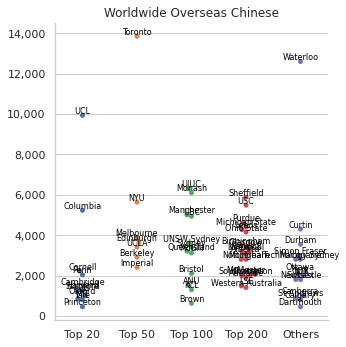

In [31]:
# Overseas

# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

temp_data = ranking
temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

#sns.catplot(x="Country", y="Overseas Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
g = sns.catplot(x="Ranking class", y="Overseas Chinese student number",
            kind="swarm", data=temp_data,
            order = temp_x_order)

plt.title("Worldwide Overseas Chinese")
plt.xlabel('')
plt.ylabel('')
g.axes[0][0].get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in range(len(temp_data.index)):
  x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
  g.axes[0][0].text(x_coord, temp_data["Overseas Chinese student number"].iloc[i]+100,
          str(temp_data.index[i]), color='black', ha='center', fontsize=8)

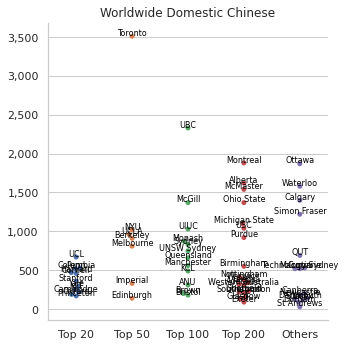

In [32]:
# Domestic

# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

temp_data = ranking
temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

#sns.catplot(x="Country", y="Domestic Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
g = sns.catplot(x="Ranking class", y="Domestic Chinese student number",
            kind="swarm", data=temp_data,
            order = temp_x_order)

plt.title("Worldwide Domestic Chinese")
plt.xlabel('')
plt.ylabel('')
g.axes[0][0].get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in range(len(temp_data.index)):
  x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
  g.axes[0][0].text(x_coord, temp_data["Domestic Chinese student number"].iloc[i]+10,
          str(temp_data.index[i]), color='black', ha='center', fontsize=8)

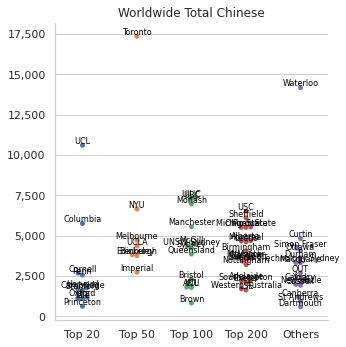

In [33]:
# Total Chinese

# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})

temp_data = ranking
temp_x_order = ['Top 20', 'Top 50', 'Top 100', 'Top 200', 'Others']

#sns.catplot(x="Country", y="Total Chinese student number", hue="Ranking class", kind="swarm", data=ranking)
g = sns.catplot(x="Ranking class", y="Total Chinese student number",
            kind="swarm", data=temp_data,
            order = temp_x_order)

plt.title("Worldwide Total Chinese")
plt.xlabel('')
plt.ylabel('')
g.axes[0][0].get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in range(len(temp_data.index)):
  x_coord = temp_x_order.index(temp_data["Ranking class"].iloc[i])
  g.axes[0][0].text(x_coord, temp_data["Total Chinese student number"].iloc[i]+100,
          str(temp_data.index[i]), color='black', ha='center', fontsize=8)

# Unstudied overseas Chinese students


Assume students cannot enroll in more than one university simultaneously.

We look at how many of them are not included in this study.

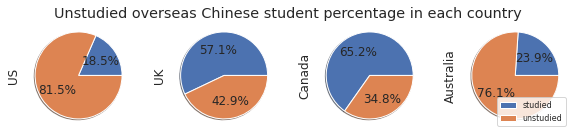

In [0]:
country_list = ['US', 'UK', 'Canada', 'Australia']

df = pd.DataFrame()

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  studied = temp_uni_o_s['Overseas Chinese student number'].sum()
  unstudied = country_o_s[country_o_s['Country']==country]['Overseas Chinese student number'].sum() - studied

  temp = pd.DataFrame({country: [studied, unstudied]},
                  index=['studied', 'unstudied'])
  
  df = pd.concat([df, temp], axis=1)

g = df.plot.pie(subplots=True, labels=None, legend=None,
                figsize=(10, 2), shadow=True, autopct='%1.1f%%',
                title="Unstudied overseas Chinese student percentage in each country")

plt.legend(df.index, loc='lower right', fontsize=8)